## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
# import os
import keras

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units = n_units, activation="relu",
                                   name = "hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units = n_units, activation="relu",
                                   name = "hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax",
                             name = "output_layer")(x)
    model = keras.models.Model(inputs=[input_layer], outputs = [out])
    
    return model

In [7]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [9]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.5, 0.8]
reduce_lr_patient = [5, 15]

In [14]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, reduce_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor = reduce_factor,
                                  min_lr=1e-12,
                                  monitor = "val_loss",
                                  patience = reduce_patient,
                                  verbose = 1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["accuracy"],
                             'valid-acc': model.history.history["val_accuracy"]}

Numbers of exp: 0, reduce_factor: 0.50, reduce_patient: 5
Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
______________________________________________________________

49/49 [==============================] - 1s 29ms/step - loss: 1.4379 - accuracy: 0.4989 - val_loss: 1.5698 - val_accuracy: 0.4463
Epoch 12/25
49/49 [==============================] - 1s 29ms/step - loss: 1.4170 - accuracy: 0.5045 - val_loss: 1.5542 - val_accuracy: 0.4549
Epoch 13/25
49/49 [==============================] - 1s 30ms/step - loss: 1.3971 - accuracy: 0.5115 - val_loss: 1.5464 - val_accuracy: 0.4574
Epoch 14/25
49/49 [==============================] - 2s 32ms/step - loss: 1.3785 - accuracy: 0.5201 - val_loss: 1.5380 - val_accuracy: 0.4619
Epoch 15/25
49/49 [==============================] - 1s 29ms/step - loss: 1.3624 - accuracy: 0.5255 - val_loss: 1.5316 - val_accuracy: 0.4650
Epoch 16/25
49/49 [==============================] - 1s 29ms/step - loss: 1.3459 - accuracy: 0.5299 - val_loss: 1.5195 - val_accuracy: 0.4684
Epoch 17/25
49/49 [==============================] - 1s 30ms/step - loss: 1.3287 - accuracy: 0.5384 - val_loss: 1.5139 - val_accuracy: 0.4683
Epoch 18/25
49/49 

Epoch 1/25
49/49 [==============================] - 2s 34ms/step - loss: 2.4318 - accuracy: 0.2128 - val_loss: 2.1839 - val_accuracy: 0.1813
Epoch 2/25
49/49 [==============================] - 1s 30ms/step - loss: 1.9088 - accuracy: 0.3418 - val_loss: 2.0473 - val_accuracy: 0.2463
Epoch 3/25
49/49 [==============================] - 2s 31ms/step - loss: 1.7614 - accuracy: 0.3880 - val_loss: 1.9174 - val_accuracy: 0.3194
Epoch 4/25
49/49 [==============================] - 2s 32ms/step - loss: 1.6812 - accuracy: 0.4131 - val_loss: 1.8074 - val_accuracy: 0.3748
Epoch 5/25
49/49 [==============================] - 1s 31ms/step - loss: 1.6248 - accuracy: 0.4327 - val_loss: 1.7257 - val_accuracy: 0.3957
Epoch 6/25
49/49 [==============================] - 1s 30ms/step - loss: 1.5818 - accuracy: 0.4452 - val_loss: 1.6725 - val_accuracy: 0.4092
Epoch 7/25
49/49 [==============================] - 1s 30ms/step - loss: 1.5452 - accuracy: 0.4586 - val_loss: 1.6459 - val_accuracy: 0.4206
Epoch 8/25
49

Epoch 21/25
49/49 [==============================] - 2s 32ms/step - loss: 0.4974 - accuracy: 0.8512 - val_loss: 1.5102 - val_accuracy: 0.5132
Epoch 22/25
49/49 [==============================] - 1s 30ms/step - loss: 0.4793 - accuracy: 0.8592 - val_loss: 1.5133 - val_accuracy: 0.5210
Epoch 23/25
49/49 [==============================] - 1s 29ms/step - loss: 0.4676 - accuracy: 0.8633 - val_loss: 1.5288 - val_accuracy: 0.5240
Epoch 24/25
49/49 [==============================] - 1s 29ms/step - loss: 0.4539 - accuracy: 0.8679 - val_loss: 1.5294 - val_accuracy: 0.5189
Epoch 25/25
47/49 [===========================>..] - ETA: 0s - loss: 0.4423 - accuracy: 0.8734
Epoch 00025: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
49/49 [==============================] - 2s 31ms/step - loss: 0.4421 - accuracy: 0.8734 - val_loss: 1.5618 - val_accuracy: 0.5152
Numbers of exp: 5, reduce_factor: 0.50, reduce_patient: 15
Model: "functional_15"
______________________________________________

49/49 [==============================] - 1s 31ms/step - loss: 1.2811 - accuracy: 0.5541 - val_loss: 1.4985 - val_accuracy: 0.4696
Epoch 7/25
49/49 [==============================] - 2s 31ms/step - loss: 1.2442 - accuracy: 0.5680 - val_loss: 1.4660 - val_accuracy: 0.4799
Epoch 8/25
49/49 [==============================] - 1s 30ms/step - loss: 1.2106 - accuracy: 0.5795 - val_loss: 1.4807 - val_accuracy: 0.4763
Epoch 9/25
49/49 [==============================] - 2s 31ms/step - loss: 1.1834 - accuracy: 0.5923 - val_loss: 1.4581 - val_accuracy: 0.4803
Epoch 10/25
49/49 [==============================] - 2s 32ms/step - loss: 1.1558 - accuracy: 0.6033 - val_loss: 1.4410 - val_accuracy: 0.4886
Epoch 11/25
49/49 [==============================] - 2s 31ms/step - loss: 1.1286 - accuracy: 0.6123 - val_loss: 1.4316 - val_accuracy: 0.4948
Epoch 12/25
49/49 [==============================] - 1s 31ms/step - loss: 1.1048 - accuracy: 0.6219 - val_loss: 1.4011 - val_accuracy: 0.5067
Epoch 13/25
49/49 [==

Epoch 1/25
49/49 [==============================] - 2s 38ms/step - loss: 1.8325 - accuracy: 0.3659 - val_loss: 2.6314 - val_accuracy: 0.1882
Epoch 2/25
49/49 [==============================] - 2s 34ms/step - loss: 1.5402 - accuracy: 0.4551 - val_loss: 2.5364 - val_accuracy: 0.2174
Epoch 3/25
49/49 [==============================] - 2s 34ms/step - loss: 1.4243 - accuracy: 0.4962 - val_loss: 2.0890 - val_accuracy: 0.3082
Epoch 4/25
49/49 [==============================] - 2s 34ms/step - loss: 1.3450 - accuracy: 0.5229 - val_loss: 1.7545 - val_accuracy: 0.3786
Epoch 5/25
49/49 [==============================] - 2s 34ms/step - loss: 1.2807 - accuracy: 0.5477 - val_loss: 1.7326 - val_accuracy: 0.3790
Epoch 6/25
49/49 [==============================] - 2s 35ms/step - loss: 1.2233 - accuracy: 0.5690 - val_loss: 1.9116 - val_accuracy: 0.3779
Epoch 7/25
49/49 [==============================] - 2s 35ms/step - loss: 1.1760 - accuracy: 0.5866 - val_loss: 1.8895 - val_accuracy: 0.3858
Epoch 8/25
49

Epoch 20/25
49/49 [==============================] - 2s 36ms/step - loss: 0.9351 - accuracy: 0.6844 - val_loss: 1.5140 - val_accuracy: 0.4822
Epoch 21/25
49/49 [==============================] - 2s 34ms/step - loss: 0.9126 - accuracy: 0.6932 - val_loss: 1.7056 - val_accuracy: 0.4376
Epoch 22/25
49/49 [==============================] - 2s 34ms/step - loss: 0.8902 - accuracy: 0.7026 - val_loss: 1.5462 - val_accuracy: 0.4690
Epoch 23/25
49/49 [==============================] - 2s 33ms/step - loss: 0.8718 - accuracy: 0.7073 - val_loss: 1.5586 - val_accuracy: 0.4787
Epoch 24/25
49/49 [==============================] - 2s 34ms/step - loss: 0.8529 - accuracy: 0.7150 - val_loss: 1.5907 - val_accuracy: 0.4717
Epoch 25/25
49/49 [==============================] - 2s 34ms/step - loss: 0.8330 - accuracy: 0.7233 - val_loss: 1.5577 - val_accuracy: 0.4677
Numbers of exp: 10, reduce_factor: 0.80, reduce_patient: 5
Model: "functional_25"
_________________________________________________________________


Epoch 6/25
49/49 [==============================] - 2s 35ms/step - loss: 1.3844 - accuracy: 0.5168 - val_loss: 1.6693 - val_accuracy: 0.4144
Epoch 7/25
49/49 [==============================] - 2s 35ms/step - loss: 1.3433 - accuracy: 0.5324 - val_loss: 1.5313 - val_accuracy: 0.4649
Epoch 8/25
49/49 [==============================] - 2s 34ms/step - loss: 1.3027 - accuracy: 0.5462 - val_loss: 1.5385 - val_accuracy: 0.4575
Epoch 9/25
49/49 [==============================] - 2s 34ms/step - loss: 1.2678 - accuracy: 0.5613 - val_loss: 1.5367 - val_accuracy: 0.4566
Epoch 10/25
49/49 [==============================] - 2s 34ms/step - loss: 1.2349 - accuracy: 0.5723 - val_loss: 1.5806 - val_accuracy: 0.4475
Epoch 11/25
49/49 [==============================] - 2s 34ms/step - loss: 1.2039 - accuracy: 0.5822 - val_loss: 1.5001 - val_accuracy: 0.4769
Epoch 12/25
49/49 [==============================] - 2s 34ms/step - loss: 1.1742 - accuracy: 0.5937 - val_loss: 1.4852 - val_accuracy: 0.4822
Epoch 13/2

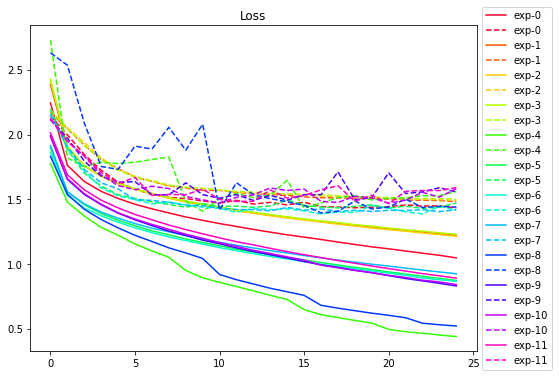

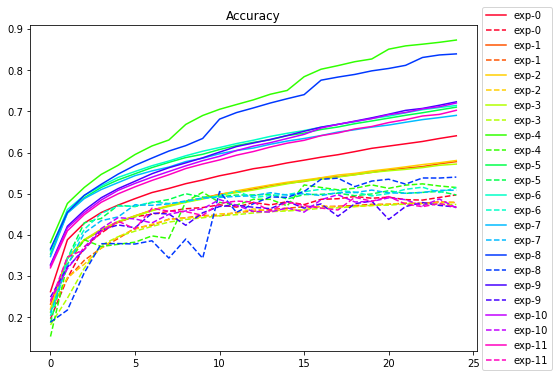

In [15]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()